In [1]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

# import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates

from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'

#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('datasets/000001.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'],axis=0, ascending=True)

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1990-12-19,,96.050,99.980,95.790,99.980,126000.00,4.940000e+05
1990-12-20,99.98,104.300,104.390,99.980,104.390,19700.00,8.400000e+04
1990-12-21,104.39,109.070,109.130,103.730,109.130,2800.00,1.600000e+04
1990-12-24,109.13,113.570,114.550,109.130,114.550,3200.00,3.100000e+04
1990-12-25,114.55,120.090,120.250,114.550,120.250,1500.00,6.000000e+03
...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07


In [3]:
data_new = data['1995-01':'2024-09'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1
data_new

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Raw_return
Day,,,,,,,,
1995-01-03,647.870,637.720,647.710,630.530,639.880,23451800.00,1.806930e+08,-0.012333
1995-01-04,639.880,641.900,655.510,638.860,653.810,42222000.00,3.069230e+08,0.021770
1995-01-05,653.810,655.380,657.520,645.810,646.890,43012300.00,3.015330e+08,-0.010584
1995-01-06,646.890,642.750,643.890,636.330,640.760,48748200.00,3.537580e+08,-0.009476
1995-01-09,640.760,637.520,637.550,625.040,626.000,50985100.00,3.985190e+08,-0.023035
...,...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07,0.036131


In [4]:
Month_data = data_new.resample('ME')['Raw_return'].apply(lambda x: (1+x).prod() - 1).to_frame()
Month_data.reset_index(inplace = True)
Month_data.rename(columns = {'Day':'month'}, inplace = True)
Month_data.set_index('month', inplace = True)
Month_data

,Raw_return
month,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [5]:
Quarter_data = data_new.resample('QE')['Raw_return'].apply(lambda x: (1+x).prod() - 1).to_frame()
Quarter_data.reset_index(inplace = True)
Quarter_data.rename(columns = {'Day':'Q'}, inplace = True)
Quarter_data.set_index('Q', inplace = True)
Quarter_data

,Raw_return
Q,
1995-03-31,-0.001466
1995-06-30,-0.025258
1995-09-30,0.145660
1995-12-31,-0.231358
1996-03-31,0.001981
...,...
2023-09-30,-0.028603
2023-12-31,-0.043575
2024-03-31,0.022263


In [6]:
Year_data = data_new.resample('YE')['Raw_return'].apply(lambda x: (1+x).prod() - 1).to_frame()
Year_data.reset_index(inplace = True)
Year_data.rename(columns = {'Day':'Year'}, inplace = True)
Year_data.set_index('Year', inplace = True)
Year_data

,Raw_return
Year,
1995-12-31,-0.142899
1996-12-31,0.651425
1997-12-31,0.302153
1998-12-31,-0.039695
1999-12-31,0.191750
2000-12-31,0.517277
2001-12-31,-0.206180
2002-12-31,-0.175167
2003-12-31,0.102670


In [7]:
inflation = pd.read_csv('datasets/inflation.csv')
inflation['month'] = pd.to_datetime(inflation['month'],format='%Y/%m/%d')
inflation.set_index('month',inplace=True)
inflation.sort_values(by=['month'],axis=0,ascending=True)

,cpi
month,
1987-01-31,5.1
1987-02-28,5.4
1987-03-31,5.8
1987-04-30,6.7
1987-05-31,7.6
...,...
2024-05-31,0.3
2024-06-30,0.2
2024-07-31,0.5


# 月度数据的预测

A simple linear regression of an asset return on one or a few lagged predictors of interest is the most popular econometric approach for testing for return predictability. For simplicity, consider a univariate predictive regression of the period- $(t + 1)$ stock market return $r_{t+1}$ on a single predictor variable $x_t$:
$$
r_{t+1}=\alpha+\beta x_{t}+\varepsilon_{t+1}
$$
where $\varepsilon_{t+1}$ is a zero-mean, unpredictable disturbance term. When $x_t$ is the inflation rate, dividend yield, book-to-price ratio, or turnover. Many researchers find that $\beta$ is significantly different from zero; that is, there is in-sample evidence of stock market return predictability.

* H0:$\beta = 0$
* H1:$\beta \ne 0$(我们需要通过理论分析，得出$\beta$的符号)

# 波动率

In [8]:
market_variance = data_new.resample('ME').apply({
    'Raw_return':
    lambda x: sum(x**2)
})
market_variance.reset_index(inplace=True)
market_variance.rename(columns={'Day':'month','Raw_return':'RV'},inplace=True)
market_variance.set_index('month',inplace=True)
market_variance

# market_variance <- daily_data[,.(MV = sum(Raw_return^2)),by = 'month'] This is R code

,RV
month,
1995-01-31,0.005695
1995-02-28,0.018086
1995-03-31,0.013378
1995-04-30,0.008281
1995-05-31,0.148387
...,...
2024-05-31,0.000915
2024-06-30,0.000642
2024-07-31,0.001441


# 换手率

## 模型 价量模型

$$
r_{t+1} = \alpha + \beta*turnover_{t} + \varepsilon_{t+1}
$$

两个假设：

换手率越高，意味着股票市场的交易越活跃，投资者们不停地在交易股票，也就是说一只股票有很多人在买也有很多人在卖，大家即有人愿意买，也有人愿意卖。这说明大家对同一只股票的看法不一样，市场整体的换手率增加了意味着投资者对于股票市场的判断分歧比较大，这种不确定性的增加有可能就是股票市场预期风险的增加，所以未来的股票的收益率上升。

* H1： $\beta > 0$

换手率越高，意味着股票市场的交易越活跃，这种更加活跃的交易带来的是投资者的热情高涨，越来越多的投资者愿意投身到股票交易中去，股票市场被更多的交易炒热了，股票价格在同一时间上升，这容易造成在同期的股票市场价格被高估。然而市场总是理性的，在未来投资者会发现之前的价格被高估了，从而还会降到正常的水平，所以未来的股票收益率会下降（未来的价格会降下来）。

* H2： $\beta < 0$

换手率的定义如下：
$$
T O_{t}=\sum_{d=1}^{D_{t}}\left(\frac{\sum_{i}^{N_{d}} N T S_{i, d, t}}{\sum_{i}^{N_{d}} N O S_{i, d, t}}\right)
$$
其中，$NTS_{i, d, t}$是股票$i$在$t$月$d$日的交易量，$NOS_{i, d, t}$是股票$i$在$t$月$d$日的流通股数。$D_{t}$是$t$月的交易天数，$N_{d}$是$d$日的交易股票数量。

每一天的交易量 A 100股 B 200股 C 300股，A的流通股1000，B股票的流通股是1500，C股票的流通股是5000,这一天的换手率是：
$$
TO_d = \frac{100 + 200 + 300}{1000 + 1500 + 5000} = 8\%
$$
第二天是9\%,第三天是10\%,月换手率 （8+9+10）\%

%b 是日期格式字符串中用于表示月份的格式代码。在Python的日期格式中，%b 用于表示月份的缩写。月份的缩写是通常是前三个字母，例如：

- Jan 表示一月
- Feb 表示二月
- Mar 表示三月
  
等等

## 中国股票市场的几个事实

- 市值：流通市值和总市值 同股同权 港股 B股
- 换手率：交易量 交易金额
- T+1
- 10% 日交易价格的限制 （会有一些例外的情况）

'{:0>6}'.format(x) 是 Python 中的字符串格式化方法，用于将变量 x 格式化为一个长度为 6 的字符串，左侧用零填充。具体解释如下：

{:0>6} 是格式说明符。
0 表示用零填充。
$>$ 表示右对齐。
6 表示总长度为 6。
例如：

如果 x 是 42，则 '{:0>6}'.format(42) 的结果是 '000042'。
如果 x 是 123456，则结果是 '123456'（因为已经是 6 位长，不需要填充）。
这个方法常用于需要固定长度的字符串表示，例如生成固定长度的编号。

In [9]:
cross = pd.read_csv('datasets/cross_section2023.csv')
from pandas.tseries.offsets import MonthEnd
cross['month'] = pd.to_datetime(cross['month'], format='%Y-%m-%d') + MonthEnd(1)
cross['to_v'] = pd.to_numeric(cross['to_v'])
cross['floatingvalue'] = pd.to_numeric(cross['floatingvalue'])
cross = cross.dropna(subset=['to_v','floatingvalue'])
cross = cross.dropna()
# 补齐股票代码 如果不满6位 在前面补上0
cross['Stkcd'] = cross['Stkcd'].apply(lambda x: '{:0>6}'.format(x)) # 6位股票代码
cross['w'] = 1
cross

,Stkcd,month,Rank,Freq,ret,floatingvalue,totalvalue,sizef,sizet,to_v,w
1,000001,1991-05-31,2,24.0,-0.128345,1.016010e+09,1.859497e+09,20.739149,21.343572,0.007087,1
2,000001,1991-06-30,3,23.0,-0.119551,9.007350e+08,1.648521e+09,20.618722,21.223144,0.001155,1
3,000001,1991-07-31,4,16.0,-0.137013,7.828100e+08,1.432695e+09,20.478401,21.082823,0.000230,1
4,000001,1991-08-31,5,15.0,-0.417680,6.748338e+08,1.346275e+09,20.329977,21.020607,0.072087,1
5,000001,1991-09-30,6,24.0,-0.039425,6.523394e+08,1.301399e+09,20.296075,20.986706,0.160940,1
...,...,...,...,...,...,...,...,...,...,...,...
752023,605599,2023-08-31,24,23.0,-0.027103,7.955351e+09,1.054667e+10,22.797111,23.079076,0.134479,1
752024,605599,2023-09-30,25,20.0,0.071030,8.530295e+09,1.130889e+10,22.866890,23.148855,0.137497,1
752025,605599,2023-10-31,26,17.0,-0.048696,8.125488e+09,1.077222e+10,22.818272,23.100237,0.086762,1
752026,605599,2023-11-30,27,22.0,-0.027956,7.908417e+09,1.048444e+10,22.791193,23.073159,0.062795,1


In [10]:

turnover = pd.DataFrame(cross.groupby(['month']).apply(
    lambda x:
    np.average(x['to_v'],weights=x['w']) 
, include_groups=False))
turnover = turnover.rename(columns={0:'to'})
turnover

,to
month,
1991-01-31,0.080590
1991-02-28,0.059403
1991-03-31,0.088436
1991-04-30,0.076774
1991-05-31,0.103625
...,...
2023-08-31,0.679114
2023-09-30,0.511237
2023-10-31,0.472415


In [11]:
turnover = pd.DataFrame(cross.groupby(['month']).apply(
    lambda x:
    np.average(x['to_v'],weights=x['floatingvalue']) 
, include_groups=False))
turnover = turnover.rename(columns={0:'to'})
turnover

,to
month,
1991-01-31,0.052992
1991-02-28,0.038486
1991-03-31,0.014105
1991-04-30,0.026301
1991-05-31,0.034965
...,...
2023-08-31,0.259480
2023-09-30,0.201205
2023-10-31,0.203478


In [12]:
reg_data = pd.merge(Month_data,market_variance,on = 'month')
reg_data = pd.merge(reg_data,inflation,on = 'month')
reg_data = pd.merge(reg_data,turnover,on='month')
reg_data = reg_data['2000':]
reg_data

,Raw_return,RV,cpi,to
month,,,,
2000-01-31,0.123242,0.008258,-0.2,0.475013
2000-02-29,0.116990,0.013547,0.7,0.605158
2000-03-31,0.049948,0.007877,-0.2,0.765140
2000-04-30,0.020053,0.002494,-0.3,0.478693
2000-05-31,0.031710,0.003515,0.1,0.348039
...,...,...,...,...
2023-08-31,-0.052009,0.001546,0.1,0.259480
2023-09-30,-0.003013,0.000884,0.0,0.201205
2023-10-31,-0.029483,0.001068,-0.2,0.203478


## 描述性统计 Summary

In [13]:
reg_data['to'].describe().round(5)

count    288.00000
mean       0.29757
std        0.16783
min        0.07209
25%        0.19069
50%        0.24678
75%        0.34555
max        1.10934
Name: to, dtype: float64

In [14]:
reg_data['to'].skew()
reg_data['to'].kurt()

1.817805798057219

4.089791339174814

## 作图

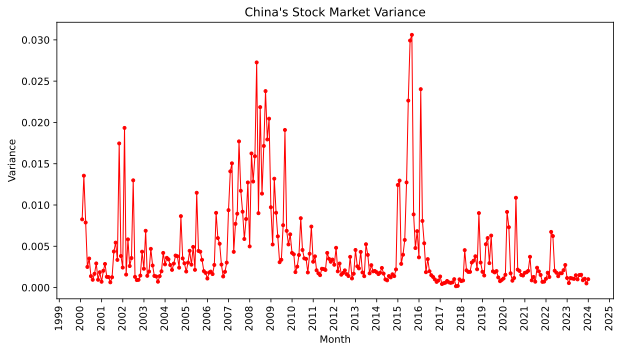

In [15]:
fig = plt.figure(figsize=(10, 5)) # 图片比例
ax = fig.add_subplot(1, 1, 1)  # 定义ax
ax.plot(
    'RV',  # 要画图的变量名
    '.-r',  # 线的类型
    linewidth = 1,  # 线的粗细
    data = reg_data['2000-01-01':'2023-12-31'])  # 画图的数据
plt.title("China's Stock Market Variance") # 画图的标题
plt.xlabel('Month') # 画图的x轴名称
plt.ylabel('Variance') # 画图的y轴名称

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

fig.savefig('Variance.pdf', bbox_inches='tight')
plt.show();

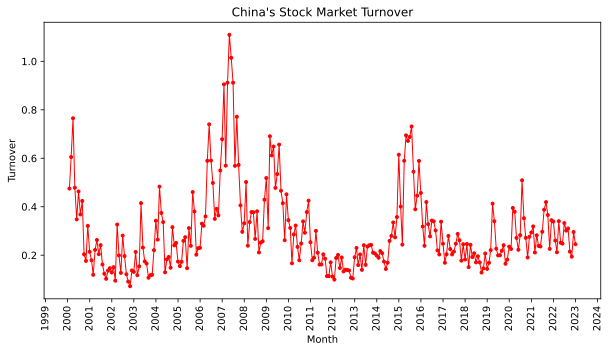

In [16]:
fig = plt.figure(figsize=(10, 5)) # 图片比例
ax = fig.add_subplot(1, 1, 1)  # 定义ax
ax.plot(
    'to',  # 要画图的变量名
    '.-r',  # 线的类型
    linewidth = 1,  # 线的粗细
    data = reg_data['2000-01-01':'2022-12-31'])  # 画图的数据
plt.title("China's Stock Market Turnover") # 画图的标题
plt.xlabel('Month') # 画图的x轴名称
plt.ylabel('Turnover') # 画图的y轴名称

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

fig.savefig('Turnover.pdf', bbox_inches='tight')
plt.show();

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


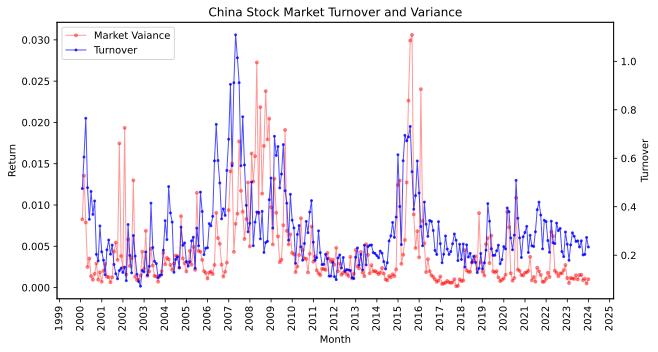

In [17]:
# Change the figure style
# list the figure style
print(plt.style.available)
#plt.style.use('ggplot')
# 使用默认的画图风格
plt.style.use('default')

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(reg_data['RV'],
         color='red',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='Market Vaiance')
ax1.set_xlabel('Month')  # 设置横坐标标签
ax1.set_ylabel('Return')  # 设置左边纵坐标标签
#ax1.legend(loc=2)  # 设置图例在左上方
ax1.set_title("China Stock Market Turnover and Variance")  # 给整张图命名

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())
# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(reg_data['to'],
         color='blue',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='Turnover')
ax2.set_ylabel('Turnover')  # 设置右边纵坐标标签
#ax2.legend(loc=1)  # 设置图例在右上方

# change the legend into one box
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

fig = plt.gcf()
fig.savefig('mvto.pdf', bbox_inches='tight')
plt.show();

In [33]:
reg_data['lRV'] = reg_data['RV'].shift(1)
model_fore_mv = smf.ols('RV ~ lRV',
                 data=reg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_mv.summary())

                            OLS Regression Results                            
Dep. Variable:                     RV   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     54.82
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           1.49e-12
Time:                        12:26:14   Log-Likelihood:                 1170.7
No. Observations:                 287   AIC:                            -2337.
Df Residuals:                     285   BIC:                            -2330.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0017      0.000      4.853      0.0

In [34]:
reg_data['lto'] = reg_data['to'].shift(1)
model_fore_mv = smf.ols('RV ~ lto',
                 data=reg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_mv.summary())

                            OLS Regression Results                            
Dep. Variable:                     RV   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     18.34
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           2.53e-05
Time:                        12:26:19   Log-Likelihood:                 1132.2
No. Observations:                 287   AIC:                            -2260.
Df Residuals:                     285   BIC:                            -2253.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.001      0.583      0.5

In [35]:
reg_data['lRV'] = reg_data['RV'].shift(1)
model_fore_mv = smf.ols('RV ~ lto + lRV',
                 data=reg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_mv.summary())

                            OLS Regression Results                            
Dep. Variable:                     RV   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     32.09
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           2.72e-13
Time:                        12:26:22   Log-Likelihood:                 1177.3
No. Observations:                 287   AIC:                            -2349.
Df Residuals:                     284   BIC:                            -2338.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0004      0.001      0.647      0.5

In [36]:
reg_data['fitted_mv'] = model_fore_mv.fittedvalues
reg_data

,Raw_return,RV,cpi,to,MarketR,rfmonth,ret,lto,lcpi,lRV,fitted_mv
month,,,,,,,,,,,
2000-01-31,0.123242,0.008258,-0.2,0.475013,0.160838,0.001856,0.158982,NaN,NaN,NaN,NaN
2000-02-29,0.116990,0.013547,0.7,0.605158,0.122024,0.001856,0.120168,0.475013,NaN,0.008258,0.007457
2000-03-31,0.049948,0.007877,-0.2,0.765140,0.055926,0.001856,0.054070,0.605158,-0.2,0.013547,0.010996
2000-04-30,0.020053,0.002494,-0.3,0.478693,0.013014,0.001856,0.011158,0.765140,0.7,0.007877,0.008937
2000-05-31,0.031710,0.003515,0.1,0.348039,0.027691,0.001856,0.025835,0.478693,-0.2,0.002494,0.004442
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,-0.052009,0.001546,0.1,0.259480,NaN,NaN,NaN,0.233906,0.0,0.001511,0.002507
2023-09-30,-0.003013,0.000884,0.0,0.201205,NaN,NaN,NaN,0.259480,-0.3,0.001546,0.002674
2023-10-31,-0.029483,0.001068,-0.2,0.203478,NaN,NaN,NaN,0.201205,0.1,0.000884,0.001987


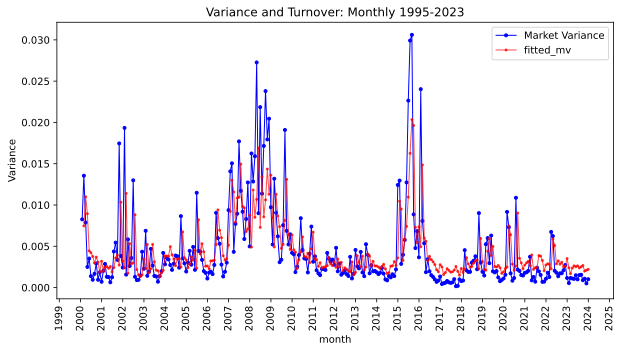

In [21]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(reg_data['RV'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         label='Market Variance')
plt.xlabel('month')  # 设置横坐标标签
plt.ylabel('Variance')  # 设置左边纵坐标标签
#plt.legend(loc=2)  # 设置图例在左上方
plt.title("Variance and Turnover: Monthly 1995-2023")  # 给整张图命名

ax1.plot(reg_data['fitted_mv'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='fitted_mv')
# ax2.set_ylabel('fitted_mv')  # 设置右边纵坐标标签
# ax2.legend(loc=1)  # 设置图例在右上方

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

plt.legend(loc='upper right')

fig.savefig('MV_fitted.pdf', bbox_inches='tight')
plt.show();

In [37]:
model_fore_ret = smf.ols('Raw_return ~ fitted_mv',
                 data=reg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_ret.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.08803
Date:                Tue, 05 Nov 2024   Prob (F-statistic):              0.767
Time:                        12:26:57   Log-Likelihood:                 353.87
No. Observations:                 287   AIC:                            -703.7
Df Residuals:                     285   BIC:                            -696.4
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0077      0.009      0.896      0.3

## 换手率直接预测

In [38]:
reg_data['lto'] = reg_data['to'].shift(1)
model_to = smf.ols('Raw_return ~ lto',
                 data=reg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_to.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     3.969
Date:                Tue, 05 Nov 2024   Prob (F-statistic):             0.0473
Time:                        12:27:02   Log-Likelihood:                 357.35
No. Observations:                 287   AIC:                            -710.7
Df Residuals:                     285   BIC:                            -703.4
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0149      0.009     -1.728      0.0

## 季度结果

In [24]:
reg_data

,Raw_return,RV,cpi,to,lto,lRV,fitted_mv
month,,,,,,,
2000-01-31,0.123242,0.008258,-0.2,0.475013,NaN,NaN,NaN
2000-02-29,0.116990,0.013547,0.7,0.605158,0.475013,0.008258,0.007457
2000-03-31,0.049948,0.007877,-0.2,0.765140,0.605158,0.013547,0.010996
2000-04-30,0.020053,0.002494,-0.3,0.478693,0.765140,0.007877,0.008937
2000-05-31,0.031710,0.003515,0.1,0.348039,0.478693,0.002494,0.004442
...,...,...,...,...,...,...,...
2023-08-31,-0.052009,0.001546,0.1,0.259480,0.233906,0.001511,0.002507
2023-09-30,-0.003013,0.000884,0.0,0.201205,0.259480,0.001546,0.002674
2023-10-31,-0.029483,0.001068,-0.2,0.203478,0.201205,0.000884,0.001987


In [25]:
Qreg_data = reg_data.resample('QE').apply({
    'Raw_return':
    lambda x: np.prod(1+x) - 1,
    'to':
    lambda x: sum(x),
    'cpi':
    lambda x: sum(x)
})
Qreg_data

,Raw_return,to,cpi
month,,,
2000-03-31,0.317318,1.845312,0.3
2000-06-30,0.071041,1.289938,0.3
2000-09-30,-0.009310,0.995923,0.8
2000-12-31,0.085501,0.711695,2.8
2001-03-31,0.018954,0.520829,2.0
...,...,...,...
2022-12-31,0.021448,0.735108,5.5
2023-03-31,0.059432,0.713979,3.8
2023-06-30,-0.021632,0.794460,0.3


In [39]:
Qreg_data['lto'] = Qreg_data['to'].shift(1)
Qreg_data['lcpi'] = Qreg_data['cpi'].shift(1)
model_to = smf.ols('Raw_return ~ lto + lcpi',
                 data=Qreg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model_to.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     4.642
Date:                Tue, 05 Nov 2024   Prob (F-statistic):             0.0120
Time:                        12:27:10   Log-Likelihood:                 58.491
No. Observations:                  95   AIC:                            -111.0
Df Residuals:                      92   BIC:                            -103.3
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0206      0.038     -0.536      0.5

In [27]:
from statsmodels.iolib.summary2 import summary_col

info_dict = {'No. observations': lambda x: f"{int(x.nobs):d}"}

model_to = smf.ols('Raw_return ~ lto',
                 data=Qreg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpi = smf.ols('Raw_return ~ lcpi',
                 data=Qreg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpito = smf.ols('Raw_return ~ lto + lcpi',
                 data=Qreg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})

results_table = summary_col(results=[model_to, model_cpi, model_cpito],
                            float_format='%0.3f', #数据显示的格式，默认四位小数
                            stars=True, # 是否有*，True为有
                            model_names=['Quarter Turnover', 'Quarter Inflation', 'Quarter CPI & Inflation'],
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'lto','lcpi'])

results_table.add_title(
    'Table - OLS Regressions: Forecast Quarterly Stock Market Return')

print(results_table)

      Table - OLS Regressions: Forecast Quarterly Stock Market Return
                 Quarter Turnover Quarter Inflation Quarter CPI & Inflation
---------------------------------------------------------------------------
Intercept        -0.063**         0.057**           -0.021                 
                 (0.032)          (0.023)           (0.038)                
lto              0.087**                            0.086**                
                 (0.039)                            (0.043)                
lcpi                              -0.007**          -0.007**               
                                  (0.003)           (0.003)                
R-squared        0.081            0.068             0.148                  
R-squared Adj.   0.071            0.058             0.129                  
No. observations 95               95                95                     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


# 更换收益率数据
All stocks

In [40]:
Marketret_allstock = pd.read_csv('datasets/Marketret_allstock.csv',encoding='gbk')
Marketret_allstock['month'] = pd.date_range(start='1991', end='2023', freq='ME')
# Keep columes: month, MarketR, rfmonth, ret
Marketret_allstock = Marketret_allstock[['month','MarketR','rfmonth','ret']]
Marketret_allstock


,month,MarketR,rfmonth,ret
0,1991-01-31,0.029998,0.006930,0.023068
1,1991-02-28,0.010203,0.006930,0.003273
2,1991-03-31,-0.099663,0.006930,-0.106593
3,1991-04-30,-0.079652,0.006651,-0.086303
4,1991-05-31,-0.074521,0.006092,-0.080613
...,...,...,...,...
379,2022-08-31,-0.019634,0.001241,-0.020875
380,2022-09-30,-0.064646,0.001241,-0.065887
381,2022-10-31,-0.041234,0.001241,-0.042475
382,2022-11-30,0.089526,0.001241,0.088285


In [41]:
reg_data = pd.merge(Month_data,market_variance,on = 'month')
reg_data = pd.merge(reg_data,inflation,on = 'month')
reg_data = pd.merge(reg_data,turnover,on='month')
reg_data = reg_data[reg_data.index >= '2000-01']
reg_data = pd.merge(reg_data,Marketret_allstock,on='month',how='left')
reg_data['lto'] = reg_data['to'].shift(1)
reg_data['lcpi'] = reg_data['cpi'].shift(2)
reg_data.set_index('month',inplace=True)
reg_data

,Raw_return,RV,cpi,to,MarketR,rfmonth,ret,lto,lcpi
month,,,,,,,,,
2000-01-31,0.123242,0.008258,-0.2,0.475013,0.160838,0.001856,0.158982,NaN,NaN
2000-02-29,0.116990,0.013547,0.7,0.605158,0.122024,0.001856,0.120168,0.475013,NaN
2000-03-31,0.049948,0.007877,-0.2,0.765140,0.055926,0.001856,0.054070,0.605158,-0.2
2000-04-30,0.020053,0.002494,-0.3,0.478693,0.013014,0.001856,0.011158,0.765140,0.7
2000-05-31,0.031710,0.003515,0.1,0.348039,0.027691,0.001856,0.025835,0.478693,-0.2
...,...,...,...,...,...,...,...,...,...
2023-08-31,-0.052009,0.001546,0.1,0.259480,NaN,NaN,NaN,0.233906,0.0
2023-09-30,-0.003013,0.000884,0.0,0.201205,NaN,NaN,NaN,0.259480,-0.3
2023-10-31,-0.029483,0.001068,-0.2,0.203478,NaN,NaN,NaN,0.201205,0.1


In [42]:
from statsmodels.iolib.summary2 import summary_col

info_dict = {'No. observations': lambda x: f"{int(x.nobs):d}"}

model_to = smf.ols('ret ~ lto',
                 data=reg_data['2000-01':'2022-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpi = smf.ols('ret ~ lcpi',
                 data=reg_data['2000-01':'2022-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpito = smf.ols('ret ~ lto + lcpi',
                 data=reg_data['2000-01':'2022-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})

results_table = summary_col(results=[model_to, model_cpi, model_cpito],
                            float_format='%0.3f', #数据显示的格式，默认四位小数
                            stars=True, # 是否有*，True为有
                            model_names=['Turnover', 'Inflation', 'CPI & Inflation'],
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'lto','lcpi'])

results_table.add_title(
    'Table - OLS Regressions: Forecast Monthly Stock Market Return')

print(results_table)

Table - OLS Regressions: Forecast Monthly Stock Market Return
                 Turnover Inflation CPI & Inflation
---------------------------------------------------
Intercept        -0.021** 0.022***  -0.004         
                 (0.010)  (0.007)   (0.012)        
lto              0.091**            0.087**        
                 (0.039)            (0.041)        
lcpi                      -0.007*** -0.007***      
                          (0.003)   (0.002)        
R-squared        0.041    0.034     0.072          
R-squared Adj.   0.038    0.031     0.065          
No. observations 275      274       274            
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [31]:
from statsmodels.iolib.summary2 import summary_col

# f is a string format
# d is an integer format
info_dict = {'No. observations': lambda x: f"{int(x.nobs):d}"}

model_to = smf.ols('Raw_return ~ lto',
                 data=reg_data['2000-01':'2022-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpi = smf.ols('Raw_return ~ lcpi',
                 data=reg_data['2000-01':'2022-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpito = smf.ols('Raw_return ~ lto + lcpi',
                 data=reg_data['2000-01':'2022-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})

results_table = summary_col(results=[model_to, model_cpi, model_cpito],
                            float_format='%0.3f', #数据显示的格式，默认四位小数
                            stars=True, # 是否有*，True为有
                            model_names=['Turnover', 'Inflation', 'CPI & Inflation'],
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'lto','lcpi'])

results_table.add_title(
    'Table - OLS Regressions: Forecast Monthly Stock Market Return')

print(results_table)

Table - OLS Regressions: Forecast Monthly Stock Market Return
                 Turnover Inflation CPI & Inflation
---------------------------------------------------
Intercept        -0.015*  0.021***  0.002          
                 (0.009)  (0.007)   (0.010)        
lto              0.066**            0.061*         
                 (0.032)            (0.034)        
lcpi                      -0.007*** -0.007***      
                          (0.002)   (0.002)        
R-squared        0.025    0.040     0.062          
R-squared Adj.   0.021    0.037     0.055          
No. observations 275      274       274            
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
